In [1]:
# * Задание 3
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
boston = load_boston() 
x = pd.DataFrame(boston.data, columns=boston.feature_names) 
y = pd.DataFrame(boston.target, columns=['price']) 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42) 
scaler = StandardScaler() 
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns) 
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns) 
tsne = TSNE(n_components=2, learning_rate=250, random_state=42) 
x_train_tsne = tsne.fit_transform(x_train_scaled) 
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)


In [12]:
labels_train = kmeans.fit_predict(x_test_scaled)
x_test_tsne = tsne.fit_transform(x_test_scaled)

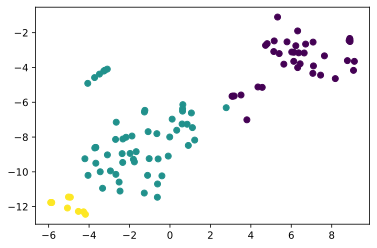

In [14]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=labels_train)
plt.show()

In [19]:
print('В кластере 0 значение',y_test[labels_train==0].mean())
print('В кластере 1 значение',y_test[labels_train==1].mean())
print('В кластере 2 значение',y_test[labels_train==0].mean())

В кластере 0 значение price    16.710526
dtype: float64
В кластере 1 значение price    22.690909
dtype: float64
В кластере 2 значение price    16.710526
dtype: float64


In [20]:
print('В кластере 0 значение CRIM',x_test['CRIM'][labels_train==0].mean())
print('В кластере 1 значение CRIM',x_test['CRIM'][labels_train==1].mean())
print('В кластере 2 значение CRIM',x_test['CRIM'][labels_train==2].mean())

В кластере 0 значение CRIM 9.419181842105264
В кластере 1 значение CRIM 0.21929690909090907
В кластере 2 значение CRIM 0.04070333333333334
